<a href="https://colab.research.google.com/github/sumandey09/Mechine-Learning/blob/main/CreditCard_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, precision_score, recall_score, accuracy_score, classification_report, auc, ConfusionMatrixDisplay

In [ ]:
df = pd.read_csv("/content/creditcard1.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# Last 5 rows of the dataset
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [ ]:
# Extract overall information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
# checking the number of missing values in each column
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
# Viewing of legit & fraudulent transactions
df['Class'].value_counts()

,count
Class,
0,284315
1,492


In [ ]:
# Displaying of legit & fraudulent transactions with piplot
fig = px.pie(data_frame = df,names = 'Class',title = 'Distribution of Classes',)
fig.show()

<bound method Axes.set of <Axes: xlabel='None'>>

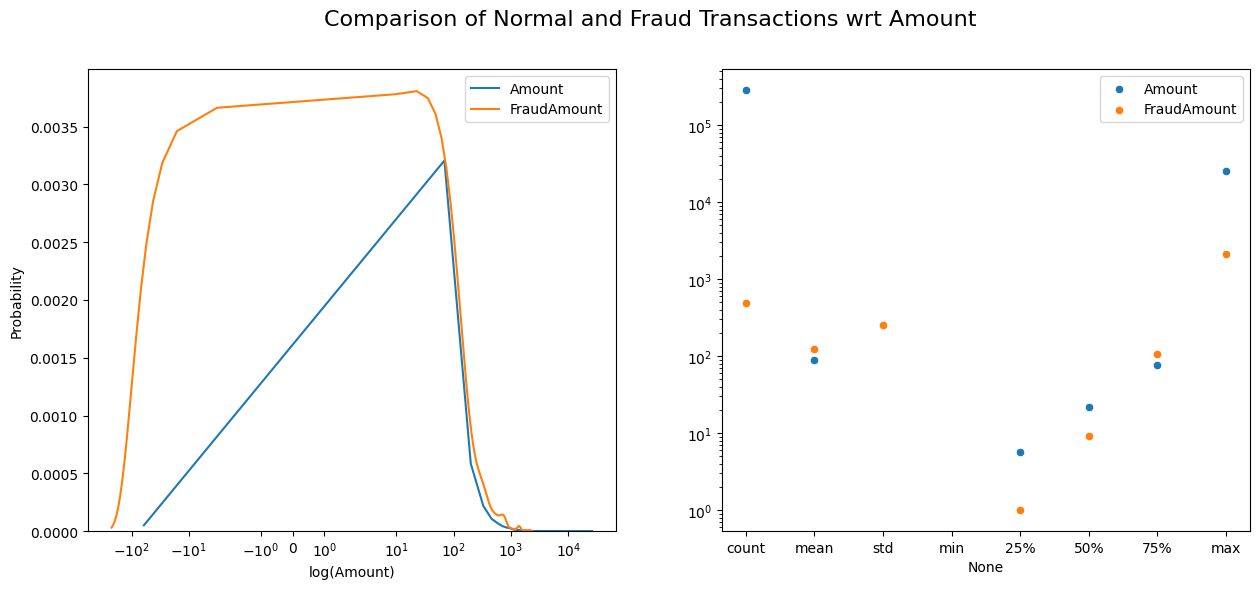

In [ ]:
# Ensure that the 'Amount' column does not have inf values by replacing them with NaN
df['Amount'] = df['Amount'].replace([np.inf, -np.inf], np.nan)

# Optionally, drop rows where 'Amount' is NaN
df = df.dropna(subset=['Amount'])

fig, ax = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Comparison of Normal and Fraud Transactions wrt Amount', fontsize=16)

# KDE plot
sns.kdeplot(df[df['Class'] == 0]['Amount'], label='Amount', ax=ax[0])
sns.kdeplot(df[df['Class'] == 1]['Amount'], label='FraudAmount', ax=ax[0])
ax[0].set_xscale('symlog')
ax[0].set_xlabel('log(Amount)')
ax[0].set_ylabel('Probability')
ax[0].legend()  # Ensure the legend is added to the first plot

# Scatter plot of summary statistics
stats_normal = df[df['Class'] == 0]['Amount'].describe()
stats_fraud = df[df['Class'] == 1]['Amount'].describe()

sns.scatterplot(x=stats_normal.index, y=stats_normal.values, label='Amount', ax=ax[1])
sns.scatterplot(x=stats_fraud.index, y=stats_fraud.values, label='FraudAmount', ax=ax[1])

ax[1].set_yscale('log')
ax[1].set

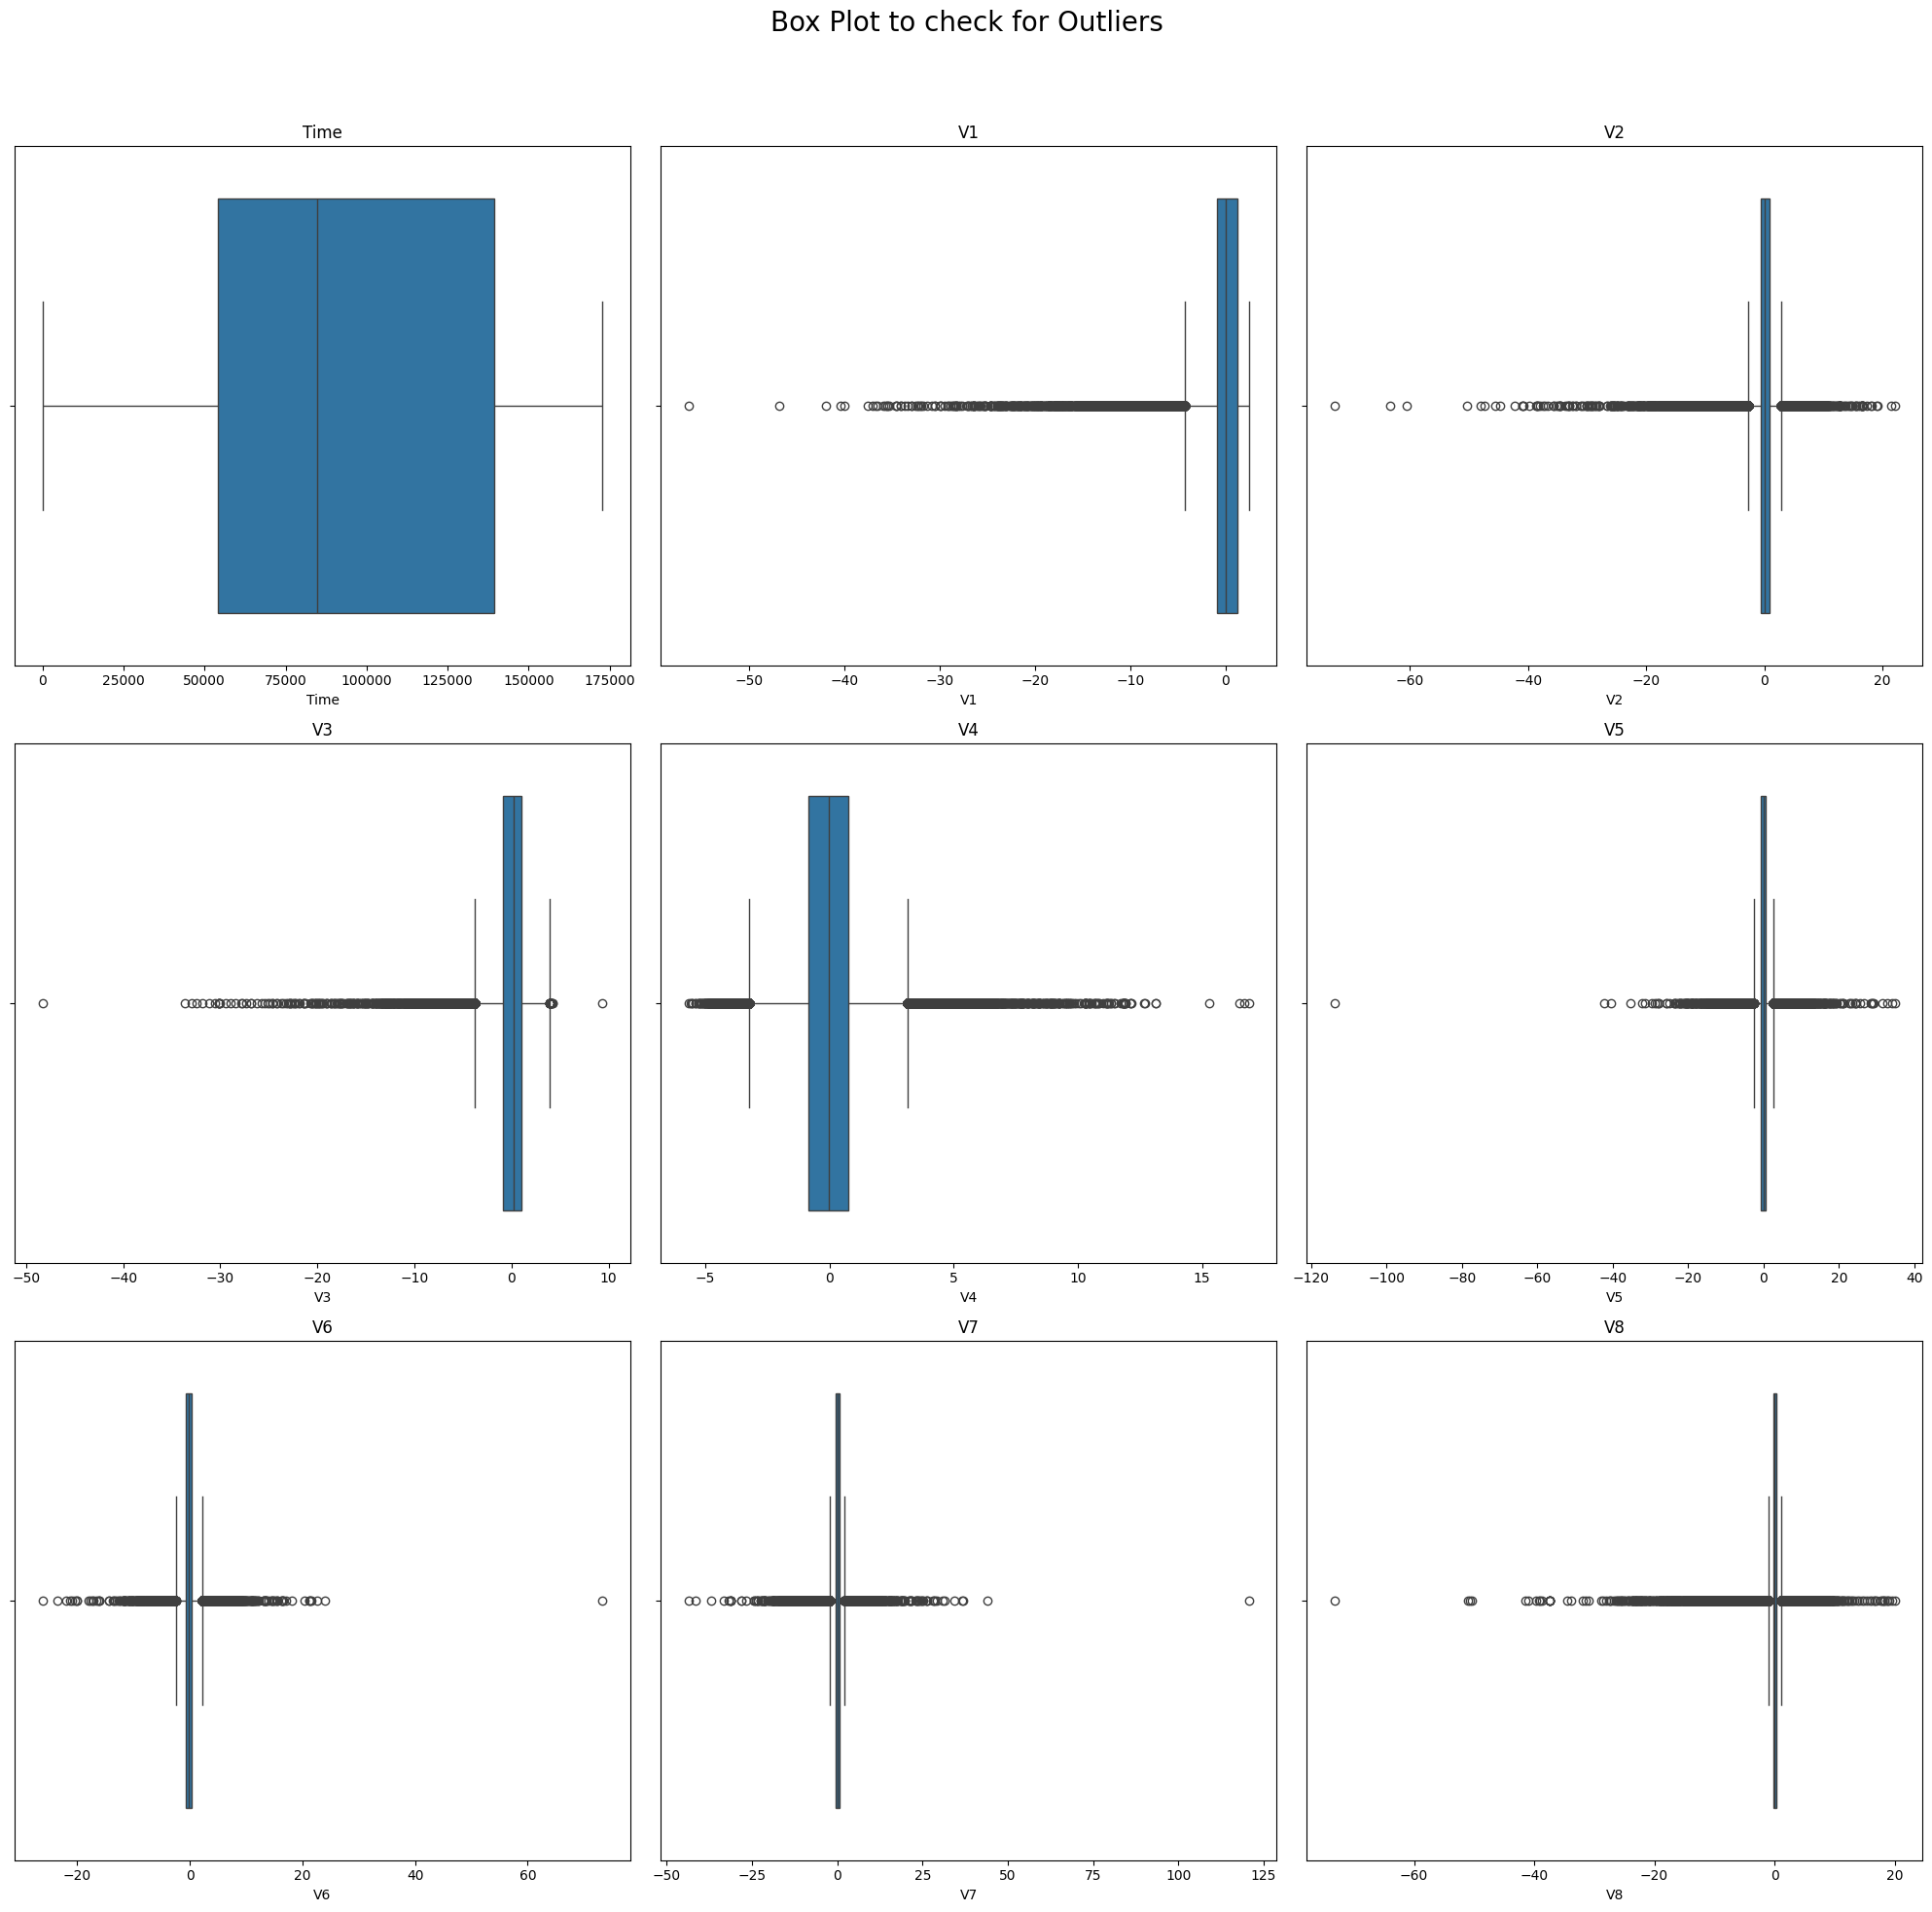

In [ ]:
# Create a 3x3 grid of subplots
fig, ax = plt.subplots(3, 3, figsize=(20, 20))
ax = ax.flatten()  # Flatten the array of axes to make indexing easier
fig.suptitle('Box Plot to check for Outliers', fontsize=20)

# Loop through the first 9 columns of the DataFrame and create a boxplot for each
for i, column in enumerate(df.columns[:9]):
    sns.boxplot(data=df, x=column, ax=ax[i])
    ax[i].set_title(column)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit title and avoid overlap
plt.show()

In [ ]:
# Compare for the both type of transactions
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [ ]:
# Separating the legit & fraudulent data for analysis
legit_transaction = df[df.Class == 0]  # 0 --> normal transaction
fraud_transaction = df[df.Class == 1]  # 1 --> fraudulent transaction

print(legit_transaction.shape)
print(fraud_transaction.shape)

(284315, 31)
(492, 31)


In [ ]:
# Statistical descriptive analysis for legit transaction data
legit_transaction.Amount.describe()

,Amount
count,284315.000000
mean,88.291022
std,250.105092
min,0.000000
25%,5.650000
50%,22.000000
75%,77.050000
max,25691.160000


In [ ]:
# Statistical descriptive analysis for fraud transaction data
fraud_transaction.Amount.describe()

,Amount
count,492.000000
mean,122.211321
std,256.683288
min,0.000000
25%,1.000000
50%,9.250000
75%,105.890000
max,2125.870000


In [ ]:
legit_transaction_sample = legit_transaction.sample(n=492)

In [ ]:
# Create a new dataframe by concatanating 2 dataframe
df_new = pd.concat([legit_transaction_sample, fraud_transaction], axis=0)

df_new.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
205708,135877.0,1.761202,-0.883260,-0.222661,0.132369,-0.697488,0.571941,-1.019289,0.299239,1.300018,...,0.349030,0.829561,0.083120,0.196766,-0.382327,-0.327523,0.035032,-0.012601,112.22,0
60000,49105.0,1.210740,-0.245161,1.017933,0.759517,-0.934151,-0.045890,-0.690932,0.152898,1.098485,...,-0.133013,-0.234578,-0.022271,-0.102884,0.289791,0.350601,0.010067,0.020707,11.50,0
194216,130484.0,-1.329623,1.635848,-1.704212,0.951780,0.197963,-0.786356,1.465488,-0.038995,-0.748024,...,0.304069,1.074823,0.069932,1.127523,-0.816509,-0.647748,-0.385712,-0.157097,107.69,0
25535,33655.0,1.175528,0.172873,0.511341,0.451663,-0.209614,-0.190465,-0.100729,0.064603,-0.260165,...,-0.175355,-0.494924,0.150436,0.020233,0.124334,0.106076,-0.014486,0.005919,1.29,0
48204,43540.0,-0.792791,0.357380,1.731941,-0.834992,0.057852,-1.192287,0.619434,-0.058462,-0.212741,...,-0.194339,-0.849405,0.153745,0.356978,-0.398537,0.322243,-0.010152,0.114507,40.00,0


In [ ]:
df_new['Class'].value_counts()

,count
Class,
0,492
1,492


In [ ]:
df_new.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,90152.796748,0.045969,0.062109,0.039586,-0.037376,0.012794,-0.067459,0.004876,-0.012679,0.083534,...,-0.042598,-0.009771,-0.012785,0.038320,0.041664,0.002834,0.005577,-0.000774,0.002879,67.891118
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


<ipython-input-18-059223046b9a>:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-18-059223046b9a>:9: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-18-059223046b9a>:13: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use e

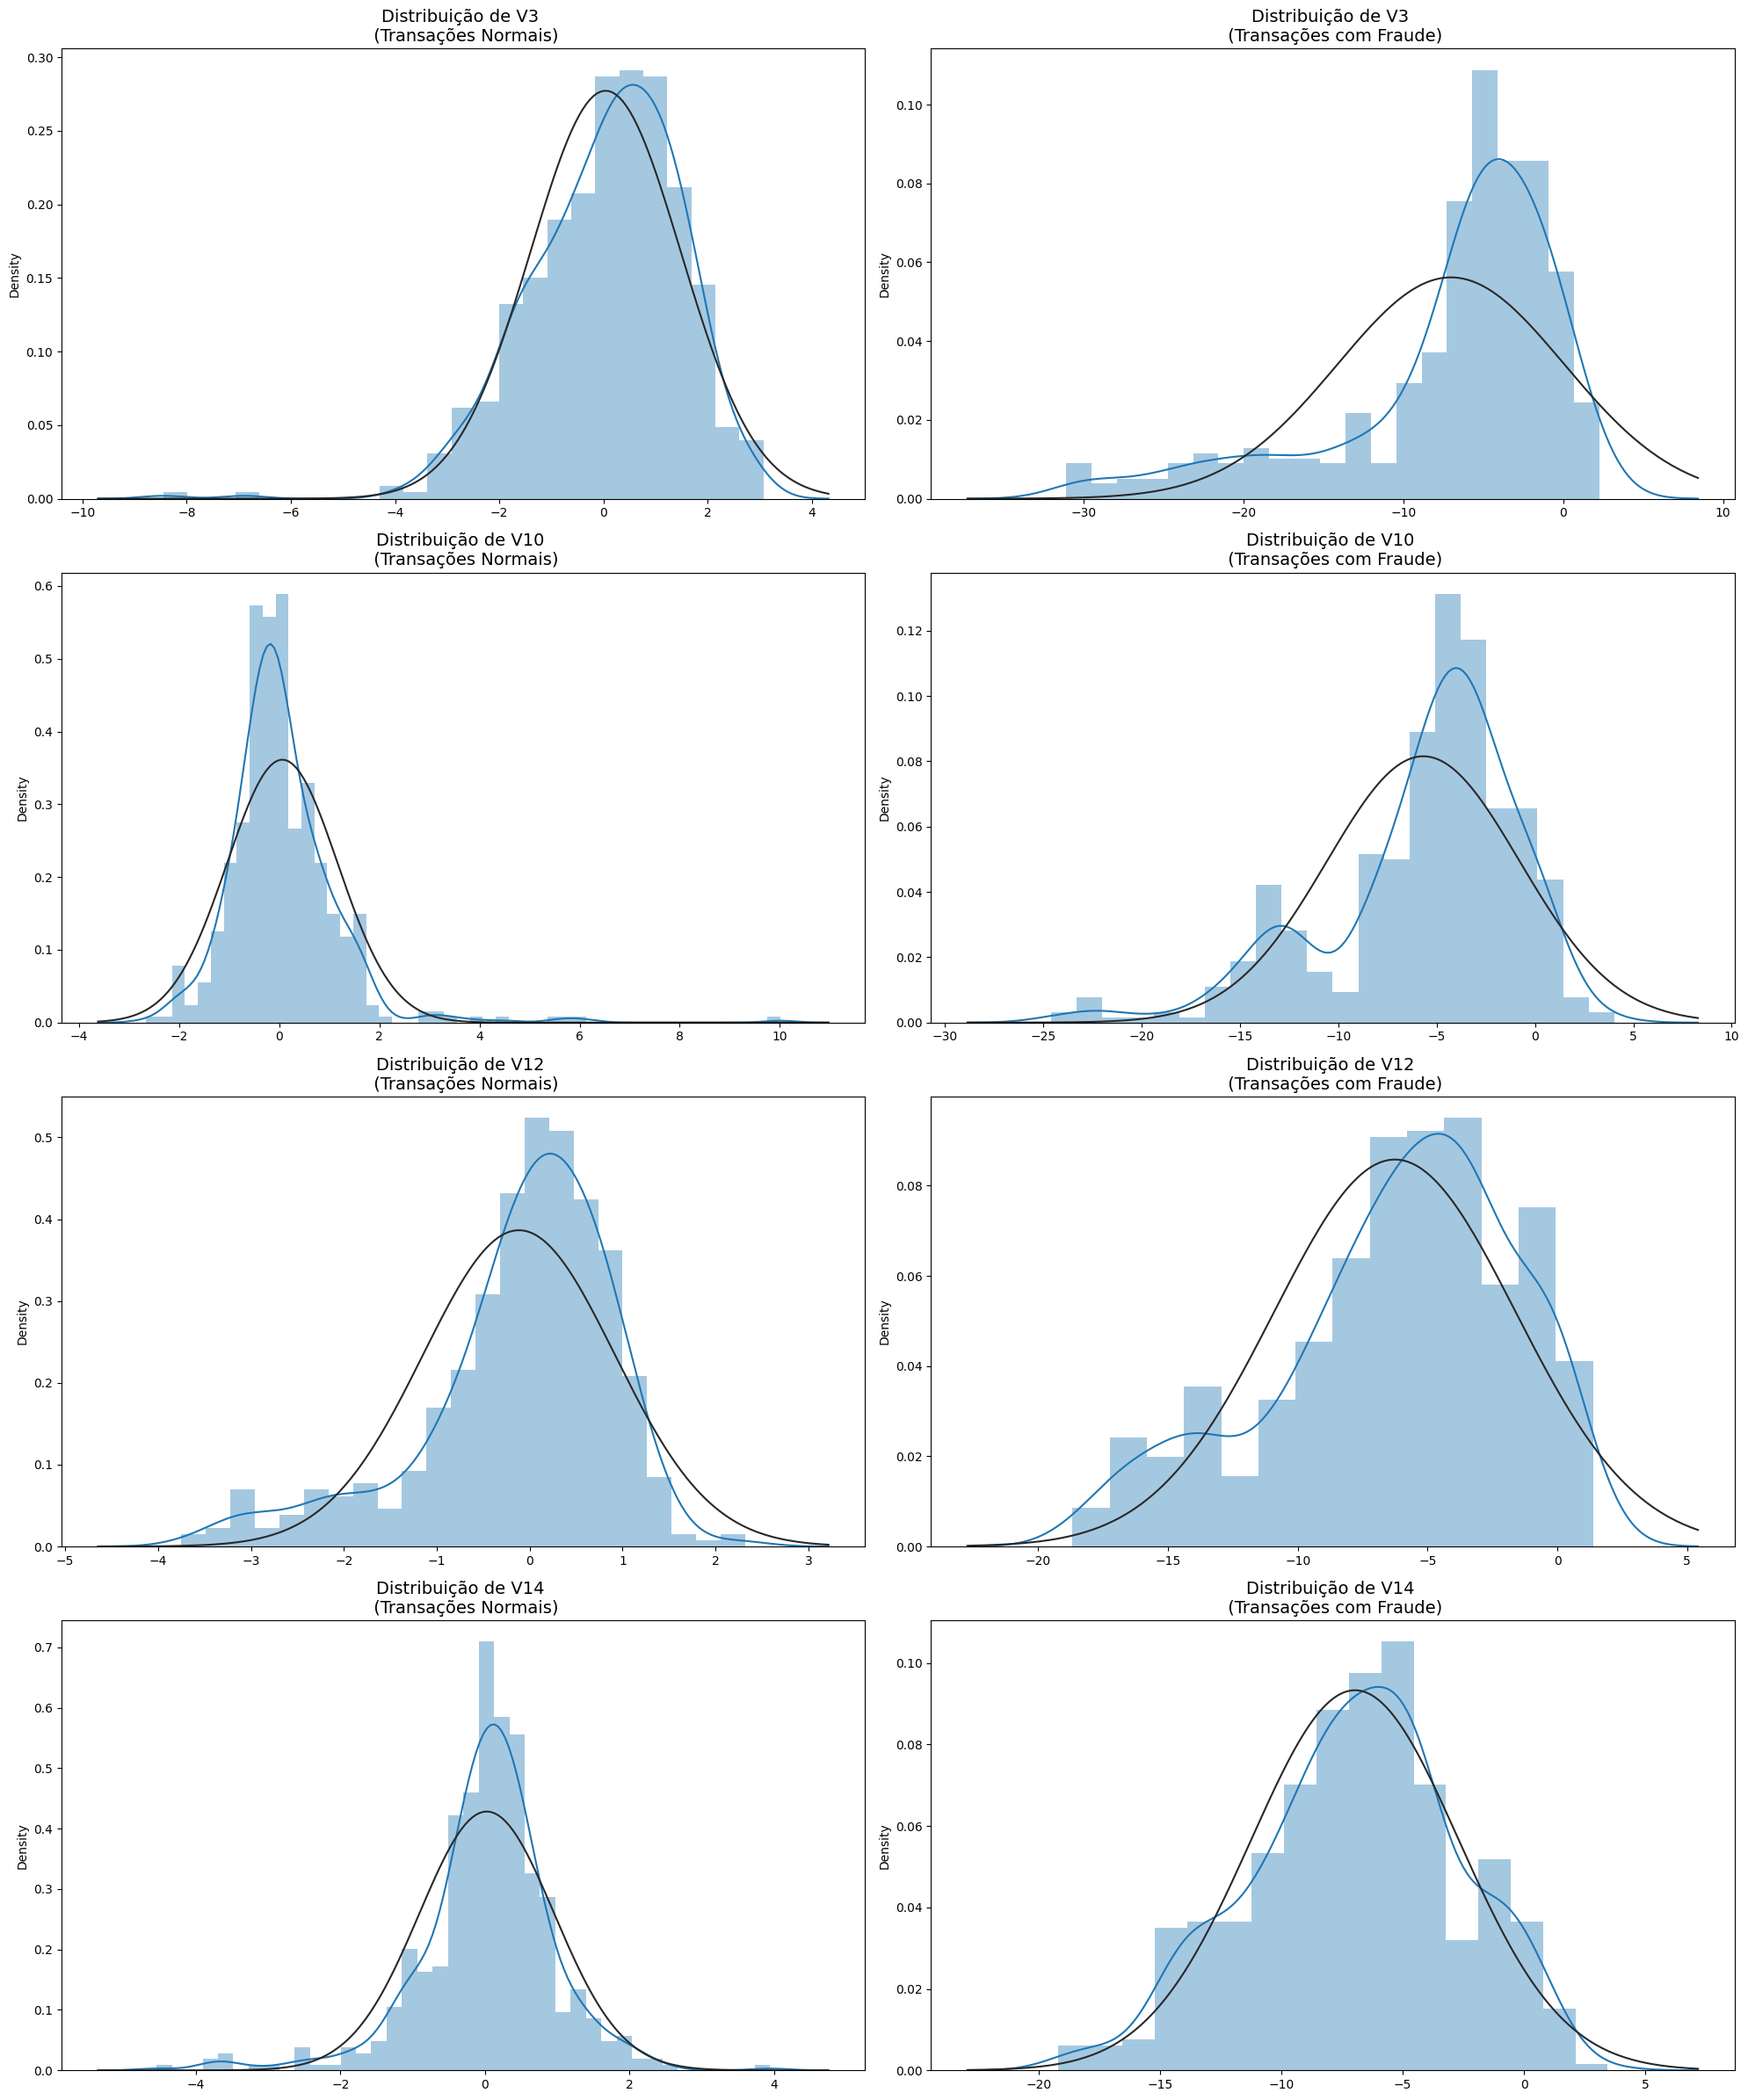

In [ ]:
from scipy.stats import norm

# Create subplots
f, ax = plt.subplots(4, 2, figsize=(20, 24))

# Plot distributions for V3
sns.distplot(df_new['V3'].loc[df_new['Class'] == 0].values, ax=ax[0][0], fit=norm)
ax[0][0].set_title('Distribuição de V3 \n (Transações Normais)', fontsize=14)
sns.distplot(df_new['V3'].loc[df_new['Class'] == 1].values, ax=ax[0][1], fit=norm)
ax[0][1].set_title('Distribuição de V3 \n (Transações com Fraude)', fontsize=14)

# Plot distributions for V10
sns.distplot(df_new['V10'].loc[df_new['Class'] == 0].values, ax=ax[1][0], fit=norm)
ax[1][0].set_title('Distribuição de V10 \n (Transações Normais)', fontsize=14)
sns.distplot(df_new['V10'].loc[df_new['Class'] == 1].values, ax=ax[1][1], fit=norm)
ax[1][1].set_title('Distribuição de V10 \n (Transações com Fraude)', fontsize=14)

# Plot distributions for V12
sns.distplot(df_new['V12'].loc[df_new['Class'] == 0].values, ax=ax[2][0], fit=norm)
ax[2][0].set_title('Distribuição de V12 \n (Transações Normais)', fontsize=14)
sns.distplot(df_new['V12'].loc[df_new['Class'] == 1].values, ax=ax[2][1], fit=norm)
ax[2][1].set_title('Distribuição de V12 \n (Transações com Fraude)', fontsize=14)

# Plot distributions for V14
sns.distplot(df_new['V14'].loc[df_new['Class'] == 0].values, ax=ax[3][0], fit=norm)
ax[3][0].set_title('Distribuição de V14 \n (Transações Normais)', fontsize=14)
sns.distplot(df_new['V14'].loc[df_new['Class'] == 1].values, ax=ax[3][1], fit=norm)
ax[3][1].set_title('Distribuição de V14 \n (Transações com Fraude)', fontsize=14)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

In [ ]:
# Feature selection for target & features
X = df_new.drop(columns='Class', axis=1)
y = df_new['Class']

# Spliting into Training & Testing Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2)

print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


In [ ]:
model_lgr = LogisticRegression(max_iter=1000)  # Increase max_iter to 1000
model_lgr.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(max_iter=1000)

In [ ]:
# Accuracy score on training data
X_train_prediction = model_lgr.predict(X_train)
train_data_accuracy = accuracy_score(X_train_prediction, y_train)
print('Accuracy on Training data : ', train_data_accuracy)


# accuracy on test data
X_test_prediction = model_lgr.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy on Training data :  0.9504447268106735
Accuracy score on Test Data :  0.9187817258883249


In [ ]:
# Predict probabilities for the ROC Curve
y_probs = model_lgr.predict_proba(X_test)[:, 1]

# Predict classes for the Confusion Matrix
y_pred = model_lgr.predict(X_test)

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Compute ROC AUC score using continuous predictions (probabilities)
roc_auc = roc_auc_score(y_test, y_probs)

# Compute accuracy, precision, recall using binary class predictions
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print('ROC AUC Score:', roc_auc)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)

ROC AUC Score: 0.9695938981653267
Accuracy: 0.9187817258883249
Precision: 0.9456521739130435
Recall: 0.8877551020408163


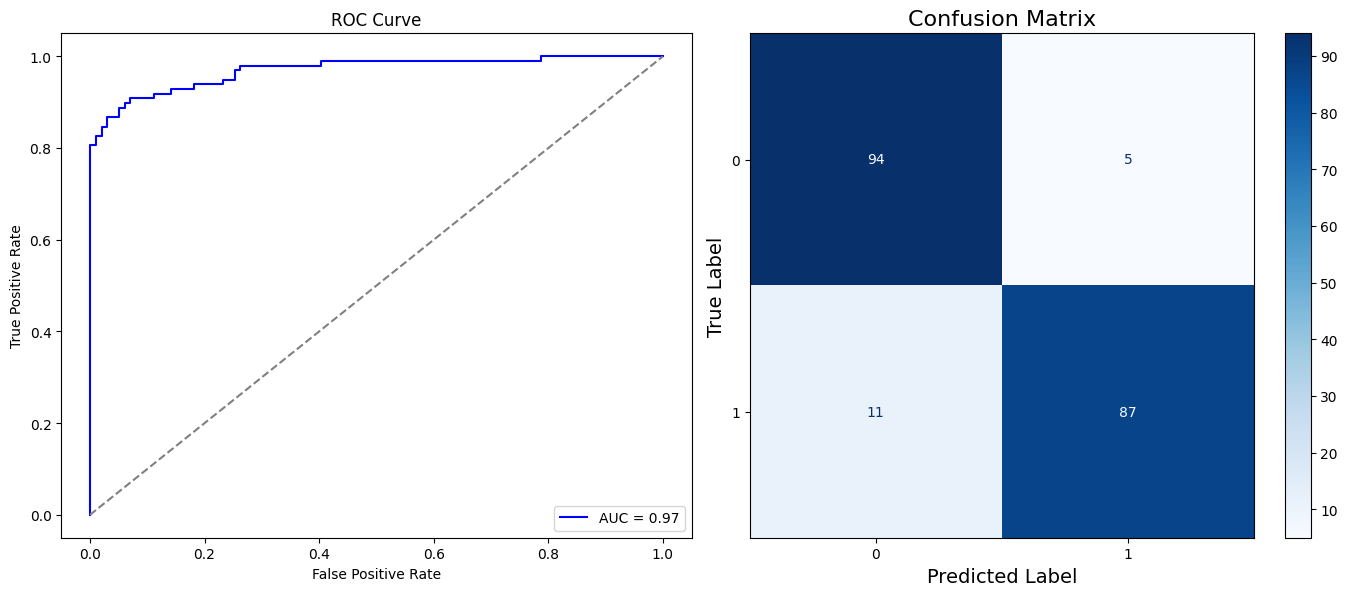

In [ ]:
# Create subplots: 1 row, 2 columns
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot ROC Curve
ax[0].plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
ax[0].plot([0, 1], [0, 1], color='gray', linestyle='--')
ax[0].set_title('ROC Curve')
ax[0].set_xlabel('False Positive Rate')
ax[0].set_ylabel('True Positive Rate')
ax[0].legend(loc='lower right')

# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=ax[1], cmap='Blues', values_format='d')
# Styling for Confusion Matrix
ax[1].set_title('Confusion Matrix', fontsize=16)
ax[1].set_xlabel('Predicted Label', fontsize=14)
ax[1].set_ylabel('True Label', fontsize=14)

# Adjust layout and show plot
plt.tight_layout()
plt.show()
